In [79]:
import os
import sys
import random
import pandas as pd

sys.path.append('../src')

from design_gene_blocks import DesignEblocks
from design_IVA_primers import DesignPrimers
from snapgene_output import SnapGeneOutput

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
# TODO INSTALL THIS IN ENVIRONMENT AND JUPYTER ENVIRONMENT (MAKE SAME ENVIRONMENT)
# !pip3 install openpyxl

In this tutorial we will randomly design a number of mutations for the replicative DNA polymerase DnaE1 from *Mycobacterium smegmatis* to better understand it's function. <br>

The expression plasmid containing Msmeg DnaE1 is XXX and is stored in XXX. <br>

Gene from mycobrowser XXX and is stored in XXX <br>

In [81]:
# File locations for input and output

vector = 'files/snapgene_vector.dna' # TODO Change name
gene = 'files/mtb_DnaE1_seq.txt' # TODO Change name to uniprot ID
output_location = 'output/'  # Location to store the files created in this notebook
codon_usage = 'Mycobacterium Smegmatis' # We want to use the codon usage of this organism
codon_usage_fp = r'C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\src\data\codon_usage' # Location of the codon usage files

First we open the nucleotide sequence of Msmeg DnaE1 and translate this to the protein sequence. Here, the start and stop codon are not translated 

In [84]:
# Load the nucleotide sequence

mtb_dnae1_dna = DesignEblocks.read_seq(gene)
print("Nucleotide sequence: ", mtb_dnae1_dna)

# Translate to protein sequence

mtb_dnae1_protein = mtb_dnae1_dna.translate()
print("Protein sequence: ", mtb_dnae1_protein)

# Create a list of all DnaE1 residues

mtb_dnae1_residues = [i + str(j) for i, j in zip(mtb_dnae1_protein, range(1, len(mtb_dnae1_protein) + 1))]
print("Residues: ", mtb_dnae1_residues)

Nucleotide sequence:  atgagcggttcatctgcggggtcctccttcgtgcacctgcacaaccacaccgagtattcgatgctggacggtgccgcgaagatcacgcccatgctcgccgaggtggagcggctggggatgcccgcggtggggatgaccgaccacggaaacatgttcggtgccagcgagttctacaactccgcgaccaaggccgggatcaagccgatcatcggcgtggaggcatacatcgcgccgggctcgcggttcgacacccggcgcatcctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgacgatgatggccgagaacgccaccggtctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacgccgagctcatcgccgaacacgccgagggcatcatcatcaccaccggatgcccgtcgggggaggtgcagacccgcctgcggctcggccaggatcgggaggcgctcgaagccgcggcgaagtggcgggagatcgtcggaccggacaactacttccttgagctgatggaccacgggctgaccatcgaacgccgggtccgtgacggtctgctcgagatcggacgcgcgctcaacattccgcctcttgccaccaatgactgccactacgtgacccgcgacgccgcccacaaccatgaggctttgttgtgtgtgcagaccggcaagaccctctcggatccgaatcgcttcaagttcgacggtgacggctactacctgaagtcggccgccgagatgcgccagatctgggacgacgaagtgccgggcgcgtgtgactccaccttgttgatcgccgaacgggtgcagtcctacgccgacgtgtggacaccgcgcgaccggatgcccgtgtttccggtgcccgatgggcatgaccaggcgtcctggctgcgtcacgaggtggac

Now we will randomly design some mutations for this gene. <br>

SINGLE MUTATIONS <br>
DOUBLE MUTATION <br>
INSERT <br>
DELETION <br>



Here, we will not select any mutations in the first or last residues of the protein

In [107]:
# Set of functions to randomly select mutations and insertions/deletions

def random_single_mutation(residues, choices, n):
    """
    Randomly select single mutations in a protein sequence.

    Parameters
    ----------
    residues : list
        List of residues in the protein sequence
    choices : list
        List of all natural amino acids
    n : int
        Number of mutations to sample
    """
    res = random.sample(residues, n)
    mut = random.sample(choices, n)
    mutants = [i + j for i, j in zip(res, mut)]
    return mutants

def random_double_mutation(residues, choices, n, max_distance_between_mutants=10):
    """
    Randomly select double mutations in a protein sequence.

    Parameters
    ----------
    residues : list
        List of residues in the protein sequence
    choices : list
        List of all natural amino acids
    n : int
        Number of mutations to sample
    max_distance_between_mutants : int
        Maximum distance (in residues) between the two mutations, default is set to 10
    """
    # TODO MAKE ALSO EXAMPLE WITH TRIPLETS AND QUADRUPLETS
    # TODO NAMING CONVENTION OF MuLTIPLE COUPLED MUTATIONS
    res1 = random.sample(residues, n)
    var1=  random.sample(choices, n)
    mut1 = [i + j for i, j in zip(res1, var1)]
    pos2 = random.sample(range(1, max_distance_between_mutants), n)  # Select positions in the vicinity of the first mutation
    var2 = random.sample(choices, n)
    mut2 = [residues[int(i[1:]) + j] + k for i, j, k in zip(res1, pos2, var2)]
    mutants = ['-'.join([i,j]) for i, j in zip(mut1, mut2)]
    return mutants

def random_double_mutation(residues, choices, n, max_distance_between_mutants=10, max_number_mutations=4):
    """
    Randomly select double mutations in a protein sequence.

    Parameters
    ----------
    residues : list
        List of residues in the protein sequence
    choices : list
        List of all natural amino acids
    n : int
        Number of mutations to sample
    max_distance_between_mutants : int
        Maximum distance (in residues) between the two mutations, default is set to 10
    """
    mutants = []  # List to store the mutants
    res1 = random.sample(residues, n)
    var1=  random.sample(choices, n)
    mut1 = [i + j for i, j in zip(res1, var1)]
    print(mut1)
    for i in mut1:
        print(i)
        num_mutations = random.sample(range(1, max_number_mutations), 1)[0]
        print("num_mutations: ", num_mutations)
        pos_x = random.sample(range(1, max_distance_between_mutants), num_mutations)
        print("pos_x: ", pos_x)
        vars_x = random.sample(choices, num_mutations)
        print(vars_x)
        mut_x = [residues[int(i[1:]) + j] + k for i, j, k in zip(res1, pos_x, vars_x)]
        print("mut_x: ", mut_x)

    # mutants = ['-'.join([i,j]) for i, j in zip(mut1, mut2)]
    return mutants


def random_insert(residues, choices, number, max_length_insertion=10):
    inserts = []
    for i in range(number):
        length_insertion = random.sample(range(1, max_length_insertion), 1)[0]
        insertion = random.sample(choices, length_insertion)
        insertion = ''.join(insertion)
        residue = random.sample(residues[20:-20], 1)[0]
        insert = residue + '-' + insertion
        inserts.append(insert)
    return inserts

def random_deletion(residues, choices, number, max_length_deletion=10):
    deletions = []
    for i in range(number):
        length_deletion = random.sample(range(1, max_length_deletion), 1)[0]
        residue_begin = random.sample(residues[20:-20], 1)[0]
        residue_end = residues[residues.index(residue_begin) + length_deletion]
        deletion = residue_begin + '-' + residue_end
        deletions.append(deletion)
    return deletions

In [108]:


# List containing all natural amino acids and options for our mutations
choices = ['A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W', 'S', 'T', 'N', 'Q', 'C', 'G', 'P', 'R', 'H', 'K', 'D', 'E']

# Randomly select single mutations
number_single = 20
selected_single_mutants = random_single_mutation(mtb_dnae1_residues[20:-20], choices, number_single)
# print(selected_single_mutants)

# Randomly select double mutations
number_double = 2
selected_double_mutants = random_double_mutation(mtb_dnae1_residues[20:-20], choices, number_double)
print(selected_double_mutants)

# Randomly select insertions
number_insertions = 2
selected_insertions = random_insert(mtb_dnae1_residues, choices, number_insertions)
# print(selected_insertions)

# Randomly select deletions
number_deletions = 2
selected_deletions = random_deletion(mtb_dnae1_residues, choices, number_deletions)
# print(selected_deletions)

total_number_mutations = number_single + number_double + number_insertions + number_deletions

['M673W', 'G387F']
M673W
num_mutations:  2
pos_x:  [4, 6]
['H', 'E']
mut_x:  ['E698H', 'P414E']
G387F
num_mutations:  3
pos_x:  [7, 6, 1]
['F', 'M', 'N']
mut_x:  ['R701F', 'P414M']
[]


In [67]:
# Formatting the mutations in a format that can be read by the DesignEblocks class (see documentation)

mutationsfile = f'files/mutations_random_N{total_number_mutations}.txt'

with open(mutationsfile, 'w') as f:
    for i in selected_single_mutants:
        f.write(i + '\n')
    for i in selected_double_mutants:
        f.write('Combined ' + i + '\n')
    for i in selected_insertions:
        f.write('Insert ' + i + '\n')
    for i in selected_deletions:
        f.write('Deletion ' + i + '\n')

In [71]:
# Create instance of DesignEblocks

eBlocks_instance = DesignEblocks(
                        sequence_fp=gene,
                        mutations_fp=mutationsfile,
                        output_fp=output_location,
                        species=species,
                        codon_usage_fp=codon_usage_fp)

V1108I
Mutation
G1041T
Mutation
Y827R
Mutation
G151C
Mutation
D574W
Mutation
A216K
Mutation
G199D
Mutation
D398Q
Mutation
A789N
Mutation
I481L
Mutation
S991S
Mutation
N784H
Mutation
R1035P
Mutation
A180E
Mutation
A484V
Mutation
G498G
Mutation
R204F
Mutation
R232M
Mutation
G923A
Mutation
Q1131Y
Mutation
Y105S-M111F
Combined
S100F-M110Q
Combined
S60-YWVGSC
Insert
D428-CSGR
Insert
A491-S497
Deletion
H127-K136
Deletion


In [72]:
print(eBlocks_instance.output_fp)

output/


In [73]:
print(eBlocks_instance.logfile)

output/design_gene_blocks.log


S60
D428
A491
H127
Optimizing bin sizes ...
201
566.95
202
566.95
203
566.95
204
661.75
205
661.75
206
661.75
207
661.75
208
661.75
209
661.75
210
612.85
211
612.85
212
612.85
213
612.85
214
661.75
215
566.95
216
566.95
217
566.95
218
566.95
219
566.95
220
566.95
221
566.95
222
566.95
223
593.95
224
593.95
225
518.35
226
566.65
227
518.05
228
566.95
229
661.75
230
674.65
231
674.65
232
661.75
233
661.75
234
661.75
235
674.65
236
674.65
237
674.65
238
674.65
239
674.65
240
674.65
241
674.65
242
674.65
243
674.65
243
752.8
240
674.65
241
674.65
242
674.65
243
674.65
243
752.8
202
566.95
203
566.95
204
661.75
205
661.75
206
661.75
207
661.75
208
661.75
209
661.75
210
612.85
211
612.85
212
612.85
213
612.85
214
661.75
215
566.95
216
566.95
217
566.95
218
566.95
219
566.95
220
566.95
221
566.95
222
566.95
223
593.95
224
593.95
225
518.35
226
566.65
227
518.05
228
566.95
229
661.75
230
674.65
231
674.65
232
661.75
233
661.75
234
661.75
235
674.65
236
674.65
237
674.65
238
674.65
239
674.65
2

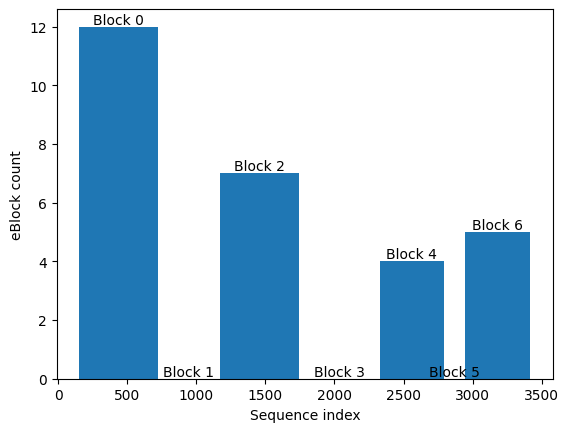

In [76]:
# run eblocks design

eBlocks_instance.run()

In [75]:
# TODO DESCRIBE WHAT CAN BE SEEN IN THE PLOT

In [ ]:
# DESCIBE WHAT OTHER FILES ARE CREATED



In [ ]:
# DECRIBE THE NEXT STEPS

In [77]:
# Next; design IVA primers to open up destination plasmid

mut_gene_blocks_fp = os.path.join(output_location, "mut_gene_blocks.npy")
wt_gene_blocks_fp = os.path.join(output_location, "wt_gene_blocks.npy")

# Create class instance

design_primers = DesignPrimers(wt_gene_blocks_fp=wt_gene_blocks_fp, 
                               mut_gene_blocks_fp=mut_gene_blocks_fp, 
                               output_location=output_location,
                               input_gene_path=gene,
                               snapgene_file=vector)

# Design the primers

design_primers.run()

# Also write results to files that SnapGene can open
primers_fp = os.path.join(output_location, "IVA_primers.csv")
gene_blocks_mutation_info_fp = os.path.join(output_location, "gene_blocks.txt")

# If you have SnapGene installed, you can add the mutations as features in this file

snapgene_output = SnapGeneOutput(wt_gene_blocks_fp = wt_gene_blocks_fp,
                                 mut_gene_blocks_fp = mut_gene_blocks_fp,
                                 primers_fp = primers_fp,
                                 output_location = output_location,
                                 snapgene_file = vector,
                                 gene_blocks_info_fp = gene_blocks_mutation_info_fp)
snapgene_output.run()


Block_2_pos_1169_1747
Block_6_pos_2948_3418
Block_4_pos_2327_2794
Block_0_pos_155_721
The template temperatures for Fw and Rv primer of Block_2_pos_1169_1747 exceed max Tm difference 4 degrees
The overhang temperatures for Fw and Rv primer of Block_0_pos_155_721 exceed max Tm difference of 4 degrees
Complementarity between the primers for Block_2_pos_1169_1747 exceeds threshold of 4
Complementarity between the primers for Block_6_pos_2948_3418 exceeds threshold of 4
Complementarity between the primers for Block_4_pos_2327_2794 exceeds threshold of 4
Primers written to file
Make sure that primer binds nowhere else in sequence
{'Block_2_pos_1169_1747': [1183, 1761], 'Block_6_pos_2948_3418': [2962, 3432], 'Block_4_pos_2327_2794': [2341, 2808], 'Block_0_pos_155_721': [169, 735]}
3335 3337
3134 3136
2492 2494
464 466
1733 1735
659 661
608 610
1205 1207
2378 2380
1454 1456
2984 2986
2363 2365
3116 3118
551 553
1463 1465
1505 1507
623 625
707 709
2780 2782
3404 3406
344 346
341 343
191 193
12

In [78]:
# TODO CLEANUP AND REMOVE UNNECCESSARY FILES